# Anopheles genomes phylogenetic scaffolding notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

## Material and methods

**To do: ADseq and DeClone, sequencing data, species tree**

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [1]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

sys.path.insert(0, './scripts')
from declone_aux import *

# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))

In [73]:
# Plotting a distribution of values per species in stacked bars (c = floating color modifier)
def plot_scores_distribution_per_species(T,nb_stacks,c,xlabel,title):
    ivalues=range(0,nb_stacks+1)
    bars={}
    bars[0]=[]
    for species in T.keys():
        bars[0].append(0.0)
    for t in ivalues:
        bars[t+1]=[]
        for species_name in T.keys():
            bars[t+1].append(T[species_name][t])
 
    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(ivalues)))
    ind    = np.arange(len(T.keys()))
    lft    = sum([np.array(bars[0])])
    height = 0.8

    for t in ivalues:
        plt.barh(ind, np.array(bars[t+1]), height=height, color=c*colors[t], left=lft)
        lft+=sum([np.array(bars[t+1])])
    plt.title(title)
    plt.yticks(ind+height/2,  T.keys())
    plt.xlabel(xlabel)    
    plt.show()

### Overview of scaffolding adjacencies

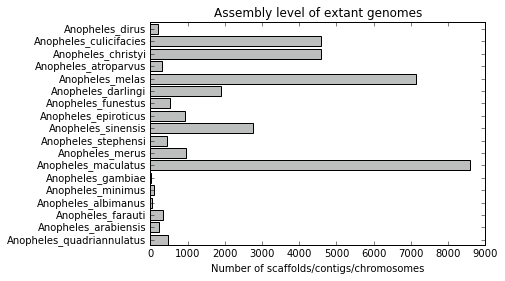

In [74]:
# Plotting the fragmentation of each species
GENOMES_FRAG={}
for species_name in GENOMES_list():
    GENOMES_FRAG[species_name]={}
    GENOMES_FRAG[species_name][0]=GENOMES_nbscf(species_name)

xlabel="Number of scaffolds/contigs/chromosomes"
title="Assembly level of extant genomes"
plot_scores_distribution_per_species(GENOMES_FRAG, 0, 0.5,xlabel,title)

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0	
Anopheles_albim	2	0	0	0	0	0	0	0	0	0	
Anopheles_arabi	154	35	27	19	11	6	10	8	10	61	
Anopheles_atrop	121	24	8	4	1	4	1	1	2	41	
Anopheles_chris	902	2	28	53	156	85	123	75	77	3119	
Anopheles_culic	1124	12	25	132	289	291	149	69	66	3627	
Anopheles_darli	46	0	3	7	6	16	7	4	46	706	
Anopheles_dirus	23	0	3	0	3	1	1	5	3	66	
Anopheles_epiro	231	14	5	8	17	31	13	30	26	601	
Anopheles_farau	21	0	1	1	4	3	2	11	4	181	
Anopheles_funes	81	0	11	12	6	10	2	10	21	333	
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0	
Anopheles_macul	1795	48	164	343	1588	325	55	186	69	5638	
Anopheles_melas	2873	76	539	616	1302	870	91	394	122	3861	
Anopheles_merus	216	4	1	5	15	17	24	20	37	583	
Anopheles_minim	19	0	0	1	1	2	0	0	2	24	
Anopheles_quadr	115	4	14	11	8	15	12	10	8	240	
Anopheles_sinen	330	21	66	120	163	201	82	44	68	1552	
Anopheles_steph	59	2	0	4	10	24	4	11	5	255	


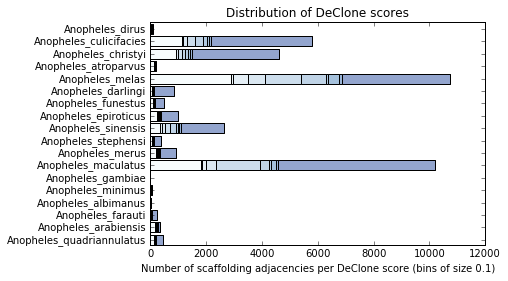

In [75]:
# Computing the 
# distribution of DeClone scores for scaffolding adjacencies in nb_bins bins
# number of scaffolding adjacencies per species
def DeClone_scores_distribution(nb_bins):
    ivalues=range(0,nb_bins+1)
    adjacencies_scores_distribution={}   # Indexed per species name and then by bins rank
    adjacencies_nb={}   # Indexed per species name and then by bins rank
    for species_name in GENOMES_list():  # Instantiating the structure adjacencies_scores_distribution
        adjacencies_scores_distribution[species_name]={}
        adjacencies_nb[species_name]=0
        for t in ivalues:
            adjacencies_scores_distribution[species_name][t]=0 
    for instance in DECLONE_instances(): # Populating the structure adjacencies_scores_distribution
        for adjacency in DECLONE_adj_per_instance(instance):
            score = DECLONE_adj_score(adjacency)
            species_name = DECLONE_adj_species_name(adjacency)
            if score<1.0 and species_name!="ANCESTRAL": # Scaffolding adjacency
                adjacencies_scores_distribution[species_name][math.floor(score*nb_bins)]+=1
                adjacencies_nb[species_name]+=1
    return((adjacencies_scores_distribution,adjacencies_nb))

# Actual plotting of the results
nb_bins=10 # Binning the adjacencies by bins of size 0.1
(ADJ_SCORES_D,ADJ_NB) = DeClone_scores_distribution(nb_bins)
# CC: I do not know how to generate a nice table: this is a pis-aller
seq="species name\t"
for t in range(0,nb_bins):
    seq+="<"+str(((t+1)/nb_bins))+"\t"
print(seq)
for species_name in GENOMES_list():
    seq=species_name[0:15]+"\t"
    for t in range(0,nb_bins):
            seq+=str(ADJ_SCORES_D[species_name][t])+"\t"
    print(seq)
xlabel="Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/nb_bins)+")"
title="Distribution of DeClone scores"
plot_scores_distribution_per_species(ADJ_SCORES_D, nb_bins, 1.0, xlabel, title)

We can observe on the table and figure above that many adjacencies seem to have a high DeClone score, aLthough for highly fragmented genomes, we can observe a large number of poorly supported adjacencies. To visualize better, we can observe the ratio of adjacencies per score.

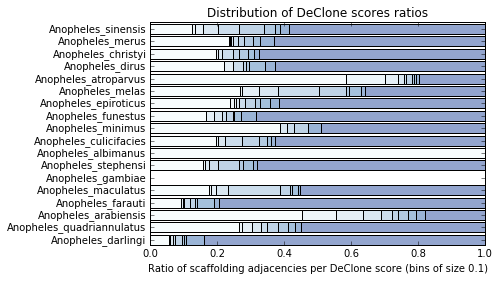

In [76]:
ADJ_SCORES_D_RATIO={}
for species_name in ADJ_SCORES_D.keys():
    ADJ_SCORES_D_RATIO[species_name]={}
    for t in ADJ_SCORES_D[species_name].keys():
        if ADJ_NB[species_name]!=0:
            ADJ_SCORES_D_RATIO[species_name][t]=ADJ_SCORES_D[species_name][t]/ADJ_NB[species_name]
        else:
            ADJ_SCORES_D_RATIO[species_name][t]=0.0

xlabel="Ratio of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/nb_bins)+")"
title="Distribution of DeClone scores ratios"
plot_scores_distribution_per_species(ADJ_SCORES_D_RATIO, nb_bins, 1.0, xlabel, title)